In [1]:
import scanpy as sc

# import mudata as mu
from pathlib import Path
import pandas as pd

%load_ext autoreload
%autoreload 2
%load_ext lab_black

path_mtx = Path(
    "/Users/giovanni.palla/Datasets/moscot/rawData_mouseStSt/countTable_mouseStSt"
)

In [2]:
import squidpy as sq
import pathlib

path = pathlib.Path("/lustre/groups/ml01/workspace/moscot_paper/mapping")
ad_viz = sq.read.vizgen(
    path=path,
    counts_file="Liver1Slice1_cell_by_gene.csv",
    meta_file="Liver1Slice1_cell_metadata.csv",
)

/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


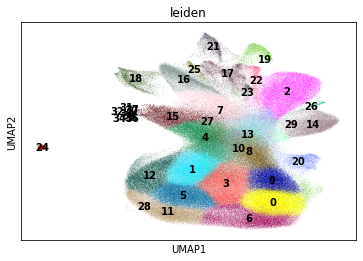

In [3]:
resolution = 1.5

# Leiden Clustering
######################

# dividing by volume instead
ad_viz.layers["counts"] = ad_viz.X.copy()
sc.pp.normalize_total(ad_viz)
sc.pp.log1p(ad_viz)
sc.pp.scale(ad_viz, max_value=10)
sc.tl.pca(ad_viz, svd_solver="arpack")
sc.pp.neighbors(ad_viz, n_neighbors=10, n_pcs=20)
sc.tl.umap(ad_viz)
sc.tl.leiden(ad_viz, resolution=resolution)

# Calculate Leiden Signatures
#########################################
ser_counts = ad_viz.obs["leiden"].value_counts()
ser_counts.name = "cell counts"
meta_leiden = pd.DataFrame(ser_counts)

cat_name = "leiden"
sig_leiden = pd.DataFrame(
    columns=ad_viz.var_names, index=ad_viz.obs[cat_name].cat.categories
)
for clust in ad_viz.obs[cat_name].cat.categories:
    sig_leiden.loc[clust] = ad_viz[ad_viz.obs[cat_name].isin([clust]), :].X.mean(0)
sig_leiden = sig_leiden.transpose()
leiden_clusters = ["Leiden-" + str(x) for x in sig_leiden.columns.tolist()]
sig_leiden.columns = leiden_clusters
meta_leiden.index = sig_leiden.columns.tolist()
meta_leiden["leiden"] = pd.Series(
    meta_leiden.index.tolist(), index=meta_leiden.index.tolist()
)

# generate colors for categories by plotting
sc.pl.umap(ad_viz, color="leiden", legend_loc="on data")
cats = ad_viz.obs["leiden"].cat.categories.tolist()
colors = list(ad_viz.uns["leiden_colors"])
cat_colors = dict(zip(cats, colors))

In [5]:
gene_panel = 'https://static-content.springer.com/esm/art%3A10.1038%2Fs41421-021-00266-1/MediaObjects/41421_2021_266_MOESM1_ESM.xlsx'
meta_gene['expression'] = ad_viz.layers["counts"].sum(axis=0)
df_ref_panel_ini = pd.read_excel(gene_panel, index_col=0)
df_ref_panel = df_ref_panel_ini.iloc[1:,:1]
df_ref_panel.index.name = None
df_ref_panel.columns = ['Function']

marker_genes = df_ref_panel[df_ref_panel['Function'].str.contains('marker')].index.tolist()
common_marker_genes = list(set(meta_gene.index.tolist()).intersection(marker_genes))
meta_gene.loc[common_marker_genes, 'Markers'] = df_ref_panel.loc[common_marker_genes, 'Function']
meta_gene['Markers'] = meta_gene['Markers'].apply(lambda x: 'N.A.' if 'marker' not in str(x) else x)
meta_gene['Markers'].value_counts()

NameError: name 'meta_gene' is not defined

In [6]:
ad_viz.var_names

Index(['Comt', 'Ldha', 'Pck1', 'Akr1a1', 'Ugt2b1', 'Acsl5', 'Ugt2a3', 'Igf1',
       'Errfi1', 'Serping1',
       ...
       'Blank-28', 'Blank-29', 'Blank-30', 'Blank-31', 'Blank-32', 'Blank-33',
       'Blank-34', 'Blank-35', 'Blank-36', 'Blank-37'],
      dtype='object', length=385)

In [4]:
# colors for clustergrammer2
ser_color = pd.Series(cat_colors)
ser_color.name = 'color'
df_colors = pd.DataFrame(ser_color)
df_colors.index = ['Leiden-' + str(x) for x in df_colors.index.tolist()]

meta_gene['info'] = pd.Series('', index=meta_gene.index.tolist())
df_colors.loc[''] = 'white'

(395215, 385)

In [5]:
# G = 5000
adata.layers["counts"] = adata.X.copy()
sc.pp.filter_genes(adata, min_cells=10)
sc.pp.filter_cells(adata, min_counts=10)
# sc.pp.highly_variable_genes(adata,layer="counts", flavor="seurat_v3")
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [6]:
adata

AnnData object with n_obs × n_vars = 388941 × 385
    obs: 'fov', 'volume', 'min_x', 'max_x', 'min_y', 'max_y', 'n_counts'
    var: 'n_cells'
    uns: 'spatial', 'log1p'
    obsm: 'spatial'
    layers: 'counts'

In [7]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

In [8]:
adata.obsm["X_pca"].shape

(388941, 50)

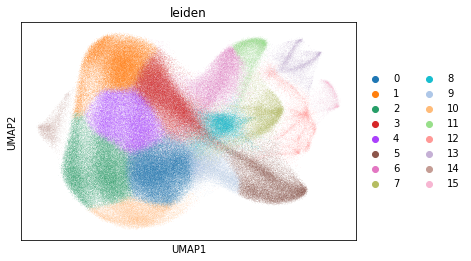

In [9]:
sc.pl.umap(adata, color="leiden")

In [13]:
adata.obsm["X_pca"].min()

-7.0788455

In [22]:
adata.uns["spatial"]

{'library': {'metadata': {}}}

In [35]:
adata.uns["pca"]["variance_ratio"].sum()

0.6132738727716996

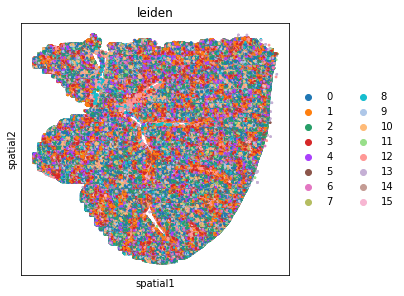

In [33]:
sq.pl.spatial_scatter(adata, shape=None, color="leiden", size=10)

In [8]:
sc.pl.umap(adata, color="leiden")

KeyError: "Could not find entry in `obsm` for 'umap'.\nAvailable keys are: ['spatial', 'X_pca']."

In [53]:
path_save = Path("/Users/giovanni.palla/Datasets/moscot")
adata_ab.write(path_save / "adata_cite.h5ad")
adata.write(path_save / "adata_sc.h5ad")